# Project1: 캘리포니아 주택 가격 분석

## 1. 데이터셋
+ scikit-learn에서 제공하는 캘리포니아 주택 가격 데이터를 제공함
+ 1990년대 캘리포니아 지역의 주택 가격에 영향을 미치는 요인은 무엇인지 파악하고, 예측하는 회귀모댈을 학습시키고자 함
+ 총 20,640개의 관측값과 8개의 독립변수(feature), 1개의 종속변수(target)으로 구성됨

## 2. 데이터 확인 및 전처리

In [3]:
#라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# 데이터 불러오기
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True)
df = data.frame
df.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521


In [77]:
#데이터 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


###### 캘리포니아 주택 가격 데이터를 확인한 결과, 관측값은 20,640개, 변수는 9개로 나타남
+ 주택 가격에 영향을 미치는 특성(feature)은 다음과 같음

  * MedInc:지역 중위 소득 (10,000 USD)
  *HouseAge:주택 연식 (건축 후 경과된 연도 수
  *AveRooms:가구당 평균 방 개수
  *AveBedrms:가구당 평균 침실 개수
  *Population:지역 내 인구 수
  *AveOccup:가구당 평균 거주 인원 수
  *Latitude:위도
  *Longitude:경도
  *종속변수(target)은 MedHouseVal(주택 중위 가격, 100,000)


In [78]:
# 데이터 전처리 : 결측값 확인
# 결측값은 없는 것으로 나타남
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

## 3. 학습/평가 데이터 분할

###### 학습 데이터와 평가 데이터를 7:3 비율로 분할함


In [26]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7061,4.1312,35.0,5.882353,0.975490,1218.0,2.985294,33.93,-118.02
14689,2.8631,20.0,4.401210,1.076613,999.0,2.014113,32.79,-117.09
17323,4.2026,24.0,5.617544,0.989474,731.0,2.564912,34.59,-120.14
10056,3.1094,14.0,5.869565,1.094203,302.0,2.188406,39.26,-121.00
15750,3.3068,52.0,4.801205,1.066265,1526.0,2.298193,37.77,-122.45
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [81]:
# 학습/평가 데이터 분할 (7:3 비율)
X = data.data                    # feature
y = data.target                  # target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [82]:
#요약 통계량 확인
df_train= pd.concat([X_train, y_train], axis = 1)
df_train.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,3.876892,28.575374,5.438125,1.098033,1427.927326,3.119236,35.650669,-119.584102,2.069240
std,1.904908,12.613634,2.453569,0.447498,1140.225190,12.373636,2.135742,2.002930,1.157492
min,0.499900,1.000000,0.888889,0.333333,3.000000,0.692308,32.550000,-124.350000,0.149990
25%,2.567225,18.000000,4.448928,1.006783,791.000000,2.430380,33.940000,-121.800000,1.193000
50%,3.539100,29.000000,5.232422,1.049492,1168.000000,2.817147,34.270000,-118.510000,1.793000
75%,4.758075,37.000000,6.060692,1.100328,1727.000000,3.279135,37.720000,-118.010000,2.646000
max,15.000100,52.000000,141.909091,25.636364,35682.000000,1243.333333,41.950000,-114.310000,5.000010


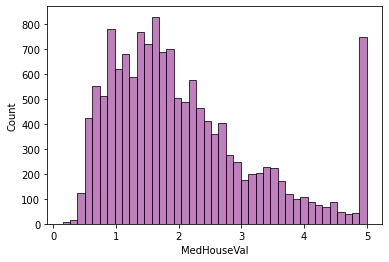

In [50]:
#중위 주택 가격에 따른 분포
plt.figure(figsize=(6,4))
sns.histplot(df_train['MedHouseVal'], color='purple',alpha=0.5)
plt.show()

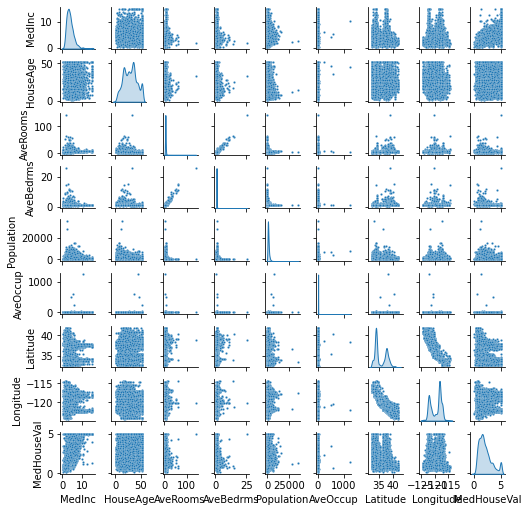

In [51]:
# 산점도
sns.pairplot(df_train, height=0.8, plot_kws={'s': 5}, diag_kind='kde')
plt.show()

###### 중위 주택 가격의 평균은 20만 달러, 표준편차는 11만 달러로 나타남
+ 최소값은 1만 4천 달러, 1사분위수는 11만 9천 달러, 중앙값은 17만 9천 달러, 3사분위수는 26만 달러, 최대값은 50만 달러임
+ 히스토그램과 상자그림을 살펴보면 중위 주택 가격이 매우 높은 이상값이 많이 존재함을 알 수 있음

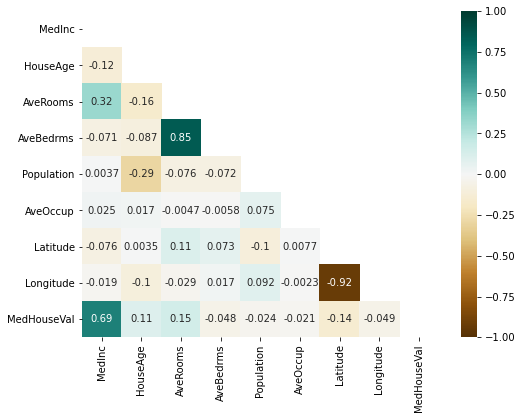

In [54]:
#상관계수
corr_train= df_train.corr()
upp_mat=np.triu(corr_train)

plt.figure(figsize=(8,6))
sns.heatmap(corr_train, annot=True, mask=upp_mat, cmap='BrBG', vmin=-1, vmax=1)
plt.show()

###### 중위 주택 가격은 지역 중위 소득과 강한 상관관계거 존재함
+ 또한 주택 연식, 가구당 평균 방 개수, 위도 간에도 약한 상관관계가 있음
+ 따라서 중위 주택 가격을 예측하는 특성(feature)으로 해당 변수를 선택함

## 5. 희귀모델 학습

In [56]:
#상관관계가 존재하는 특성(feature) 선택
features= ['MedInc','HouseAge', 'AveRooms', 'Latitude']
X_train=df_train[features]

In [58]:
#선형 회귀모델 생성 및 학습
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, y_train)

#,회귀계수(,regression coefficient)
pd.DataFrame({'features': features,'Coefficient': model.coef_})

,features,Coefficient
0,MedInc,0.435658
1,HouseAge,0.016937
2,AveRooms,-0.019505
3,Latitude,-0.045071


## 특성(feature)가 중위 주택 가격(target)에 미치는 영향은 다음과 같음
+ 회계계수를 살펴보면 중위 주택 가격은 지역 중위 소득이 주택 가격은 4만 3천 달러 증가하는 것으로 나타남. 이는 경제적으로 여유가 있을수록 좋은 집에 거주함을 경향이 있음을 보임
+ 또한 중위 주택 가격은 중위 연식이 1년 증가하면 1693달러 증가하는 것으로 나타남
+ 또한 중위 주택 가격은 평균 방 개수가 1개 증가하면 1950달러, 위도가 1도 증가하면 4507달러로 감소하는 경향이 있음
+ 이는 경제적으로 여유가 있을수록 좋은 집에 거주함을 알 수 있으며, 일반적으로 캘리포니아주는 남부 지역이 상대적으로 대도시가 많아 주택 가격이 더 높은 것으로 판단됨


## 6. 회귀모델 평가

In [72]:
#평가 데이터에서도 학습 데이터에서 사용한 독립변수만 선택
X_test= X_test[features]
#회귀모델 평가:RMSE, 결정계수
from sklearn.metrics import mean_squared_error, r2_score
#학습 데이터로 학습한 회귀모델에 평가 데이터를 입력하여 예측값 계산
y_pred=model.predict(X_test)

#평가 데이터의 실제 관측값과 예측겂을 비교하여 모델을 평가
from sklearn.metrics import mean_squared_error, r2_score
RMSE= mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

print(f' 결정계수 : {R2:.3f}')
print(f' RMSE : {RMSE:.3f}')

 결정계수 : 0.520
 RMSE : 0.630


+ RMSE는 0.630으로, 주택 중위 가격의 실제값과 예측값이 평균적으로 약 6만 달러 차이가 있다는 것을 의미함
+훈련 데이터에서 주택 중위 가격의 평균은 약 20만 달러인 점을 고려하면, 모델의 평균 오차는 약 30% 수준임을 알 수 있음
+따라서 평균 오차가 비교적 큰 편이므로, 모델 성능 개선이 필요한 것으로 판단됨
+회귀계수를 살펴보면 지역 중위 소득, 주택 연식이 증가할수록 주택 중위 가격은 높아지며, 가구당 평균 거주 인원 수, 위도가 증가할수록 주택 중위 가격은 낮아지는 것으로 나타남